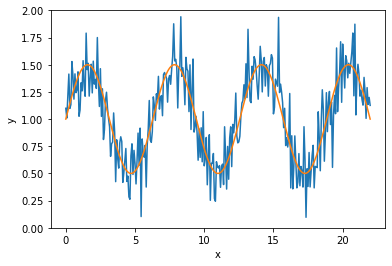

Linear regression score: -0.4459827970437929
Polynomial regression score: -0.622878069599461
Difference: 0.17689527255566811
Coefficients of polynomial regression and linear regression:
[-0.03190358  0.20818594 -0.00937904]
0.856999187854241 [-0.00918622]


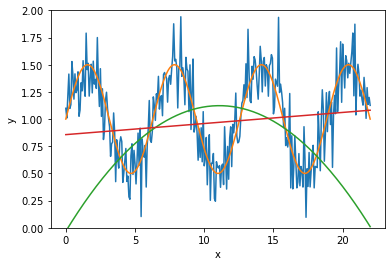

Test set RMSE: 0.4403109417232645
Mean validation RMSE: 0.4459827970437929


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
np.random.seed(42)
 
# Generate data and plot
N = 300
x = np.linspace(0, 7*np.pi, N)
smooth = 1 + 0.5*np.sin(x)
y = smooth + 0.2*np.random.randn(N)
plt.plot(x, y)
plt.plot(x, smooth)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(0,2)
plt.show()
 
# Train-test split, intentionally use shuffle=False
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
 
# Create two models: Polynomial and linear regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
linreg = LinearRegression()
 
# Cross-validation
scoring = "neg_root_mean_squared_error"
polyscores = cross_validate(polyreg, X_train, y_train, scoring=scoring, return_estimator=True)
linscores = cross_validate(linreg, X_train, y_train, scoring=scoring, return_estimator=True)
 
# Which one is better? Linear and polynomial
print("Linear regression score:", linscores["test_score"].mean())
print("Polynomial regression score:", polyscores["test_score"].mean())
print("Difference:", linscores["test_score"].mean() - polyscores["test_score"].mean())
 
print("Coefficients of polynomial regression and linear regression:")
# Let's show the coefficient of the last fitted polynomial regression
# This starts from the constant term and in ascending order of powers
print(polyscores["estimator"][0].steps[1][1].coef_)
# And show the coefficient of the last-fitted linear regression
print(linscores["estimator"][0].intercept_, linscores["estimator"][-1].coef_)
 
# Plot and compare
plt.plot(x, y)
plt.plot(x, smooth)
plt.plot(x, polyscores["estimator"][0].predict(X))
plt.plot(x, linscores["estimator"][0].predict(X))
plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
 
# Retrain the model and evaluate
import sklearn
linreg = sklearn.base.clone(linreg)
linreg.fit(X_train, y_train)
print("Test set RMSE:", mean_squared_error(y_test, linreg.predict(X_test), squared=False))
print("Mean validation RMSE:", -linscores["test_score"].mean())